<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covis19_mortes_comparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de dados dos óbitos causados pela COVID-19**

***Nesse notebook iremos analisar os casos de fatalidade onde o resultados da Covid-19 no infectado foi a morte.***


Atualmente, seu nome está sendo associado à pandemia de COVID-19 - doença causada por uma nova espécie de coronavírus, o SARS-CoV-2, cujos sintomas variam desde manifestações leves, como perda de olfato e paladar, até quadros mais graves, que provocam falta de ar e podem levar à morte.[(Fonte)](https://www.minhavida.com.br/saude/temas/novo-coronavirus)


###**Objetivos**

- Observar informções relevantes sobre os óbitos mundiais;
- Verificar os países onde estão as maiores quantidades de mortes;
- Observar o acumulo individual dos óbitos de cada país do top 5 com maior número de óbitos;
- Observar a comparação entre os óbitos dos países em uma unica visualização.


**Fonte:** https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

mortes_globais = pd.read_csv(url)

In [3]:
mortes_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598,2611,2618,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686,2698,2710,2713
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383,2386,2389,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412,2416,2420,2423
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155,3160,3165,3172,3181,3190,3198,3207,3217,3225,3234,3244,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328,3335,3343,3350
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,117,117,117,119,120,120,120,120,121,121,121,121,123,123,123,123,123,123,123,123,124,124,124,124,125,125,125,125,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,540,542,543,547,547,549,549,550,553,554,554,557,557,560,561,561,563,565,570,572,574,577,579,583,587,591,594,596,600,602,603,609,618,622,628,630,633,636,639,645


In [4]:
mortes_globais = mortes_globais.drop(['Lat', 'Long'], axis=1)

In [5]:
mortes_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598,2611,2618,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686,2698,2710,2713
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383,2386,2389,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412,2416,2420,2423
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155,3160,3165,3172,3181,3190,3198,3207,3217,3225,3234,3244,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328,3335,3343,3350
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,117,117,117,119,120,120,120,120,121,121,121,121,123,123,123,123,123,123,123,123,124,124,124,124,125,125,125,125,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,540,542,543,547,547,549,549,550,553,554,554,557,557,560,561,561,563,565,570,572,574,577,579,583,587,591,594,596,600,602,603,609,618,622,628,630,633,636,639,645


In [6]:
mortes_globais = mortes_globais.groupby('Country/Region').sum()

In [7]:
mortes_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582,2592,2598,2611,2618,2625,2631,2637,2642,2648,2654,2664,2673,2683,2686,2698,2710,2713
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378,2379,2383,2386,2389,2394,2396,2397,2399,2402,2403,2406,2408,2411,2412,2416,2420,2423
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155,3160,3165,3172,3181,3190,3198,3207,3217,3225,3234,3244,3253,3261,3270,3280,3289,3299,3307,3315,3321,3328,3335,3343,3350
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,117,117,117,119,120,120,120,120,121,121,121,121,123,123,123,123,123,123,123,123,124,124,124,124,125,125,125,125,127,127,127,127,127,127,127,127,127,127,127
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,540,542,543,547,547,549,549,550,553,554,554,557,557,560,561,561,563,565,570,572,574,577,579,583,587,591,594,596,600,602,603,609,618,622,628,630,633,636,639,645


# **Situação global em 12 de Maio de 2021**

In [60]:
#Média de mortes por país no mundo
mortes_globais.iloc[:,-1].mean()

17350.307291666668

In [59]:
#Total de mortes no mundo(soma de todos os países)
mortes_globais.iloc[:,-1].sum()

3331259

In [76]:
#Top 10 países com maior número de mortes
dados_dash = mortes_globais.iloc[:,-1].sort_values(ascending = False).head(10)
dados_dash

Country/Region
US                583685
Brazil            428034
India             258317
Mexico            219590
United Kingdom    127901
Italy             123544
Russia            112410
France            107280
Germany            85451
Colombia           79261
Name: 5/12/21, dtype: int64

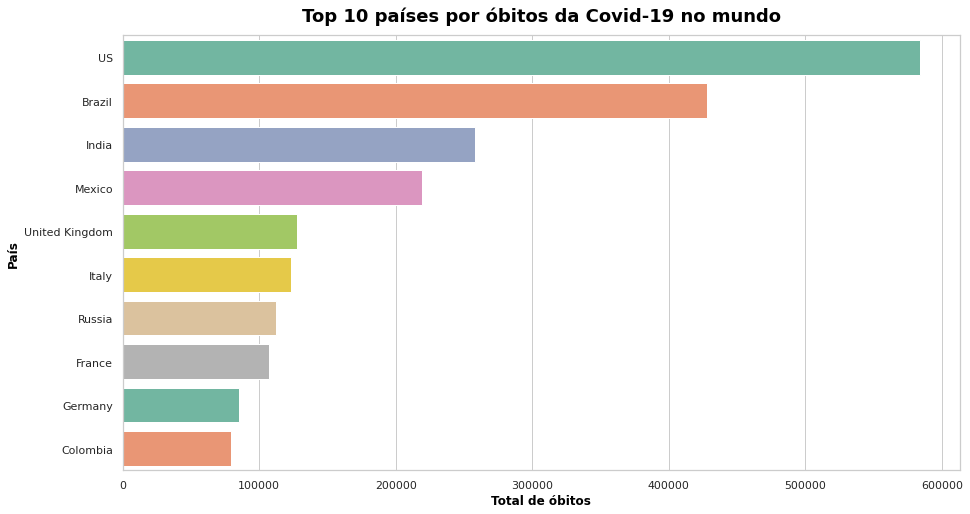

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(x=dados_dash.values, y = dados_dash.index, orient="h", palette="Set2")
plt.title('Top 10 países por óbitos da Covid-19 no mundo',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Total de óbitos', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.ylabel('País', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.show()

In [97]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, mortes, pais):
    titulo = 'Acumulo de mortes causadas pela COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de óbitos',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, mortes, color = 'red')
    plt.show()

# **Dados dos óbitos no Brasil**

In [10]:
mortes_brasil = mortes_globais.loc['Brazil']

In [11]:
mortes_brasil

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/8/21     421316
5/9/21     422340
5/10/21    423229
5/11/21    425540
5/12/21    428034
Name: Brazil, Length: 477, dtype: int64

In [12]:
mortes_brasil = mortes_brasil.loc[::10]

In [13]:
data_br = mortes_brasil.index
mortes_br = mortes_brasil.values

In [14]:
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21', '4/26/21', '5/6/21'],
      dtype='object')

In [15]:
mortes_br

array([     0,      0,      0,      0,      0,      0,     25,    240,
         1124,   2741,   6412,  11653,  20047,  29314,  39680,  49976,
        59594,  70398,  80120,  91263, 101049, 111100, 120262, 127464,
       135793, 142058, 148957, 153675, 158456, 162269, 166699, 171974,
       177317, 184827, 191139, 198974, 209296, 218878, 230034, 239773,
       251498, 265411, 284775, 310550, 336947, 368749, 391936, 416949])

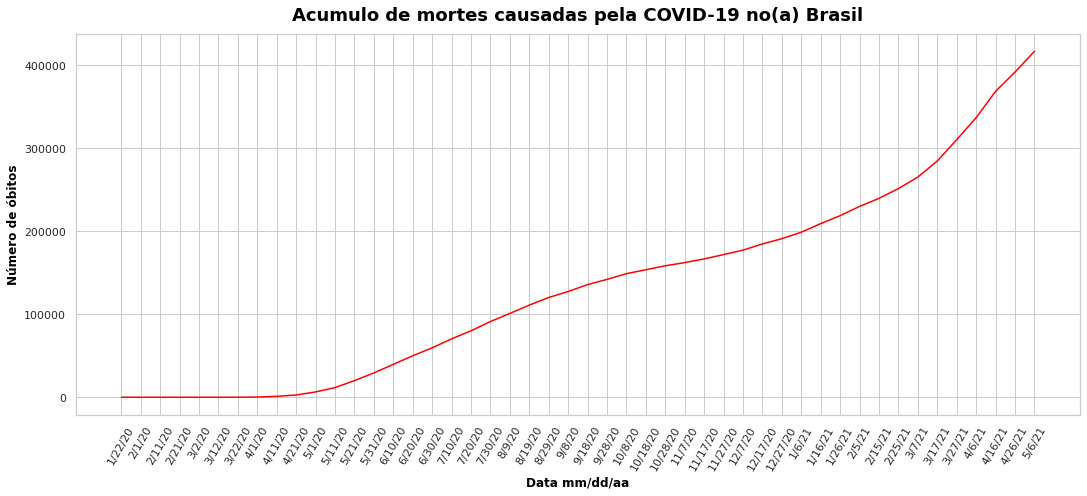

In [98]:
Grafico_de_linha(data_br, mortes_br, 'Brasil')

# **Dados dos óbitos no México**

In [40]:
mortes_mexico = mortes_globais.loc['Mexico']

In [41]:
mortes_mexico = mortes_mexico.loc[::10]

In [42]:
data_mx = mortes_mexico.index
mortes_mx = mortes_mexico.values

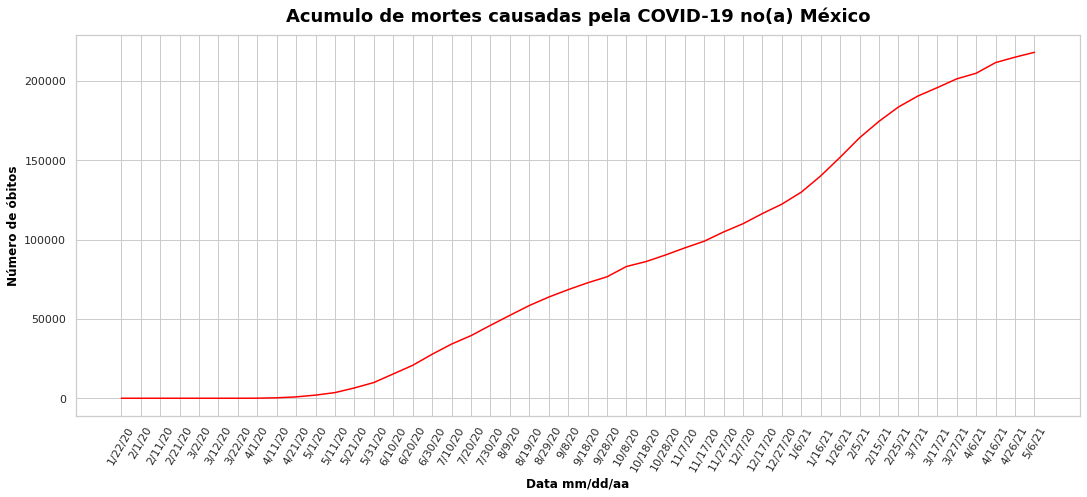

In [99]:
Grafico_de_linha(data_mx, mortes_mx, 'México')

# **Dados dos óbitos no Reino Unido**

In [46]:
mortes_runido = mortes_globais.loc['United Kingdom']

In [47]:
mortes_runido = mortes_runido.loc[::10]

In [48]:
data_uk = mortes_runido.index
mortes_uk = mortes_runido.values

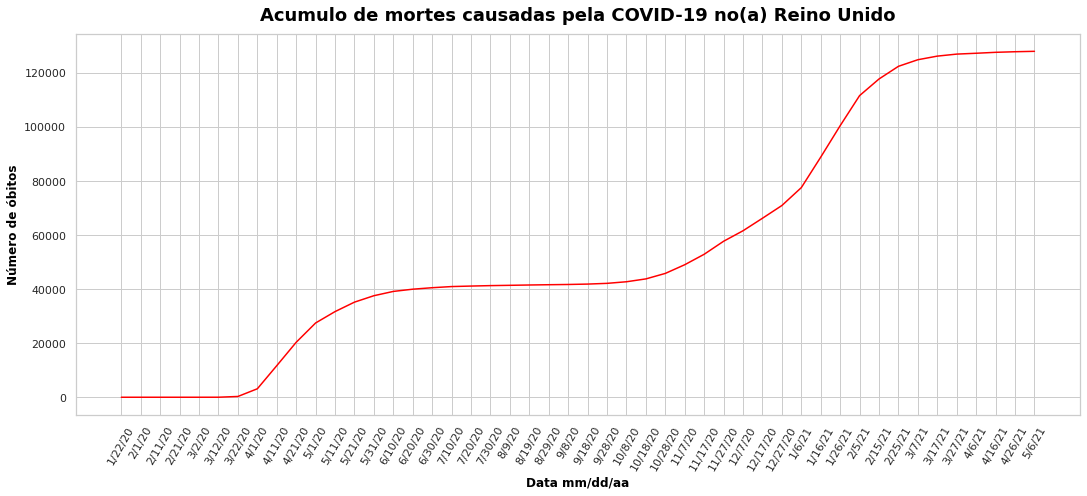

In [100]:
Grafico_de_linha(data_uk, mortes_uk, 'Reino Unido')

# **Dados dos óbitos nos Estados Unidos**

In [25]:
mortes_estados_unidos = mortes_globais.loc['US']

In [26]:
mortes_estados_unidos = mortes_estados_unidos.loc[::10]

In [27]:
data_us = mortes_estados_unidos.index
mortes_us = mortes_estados_unidos.values

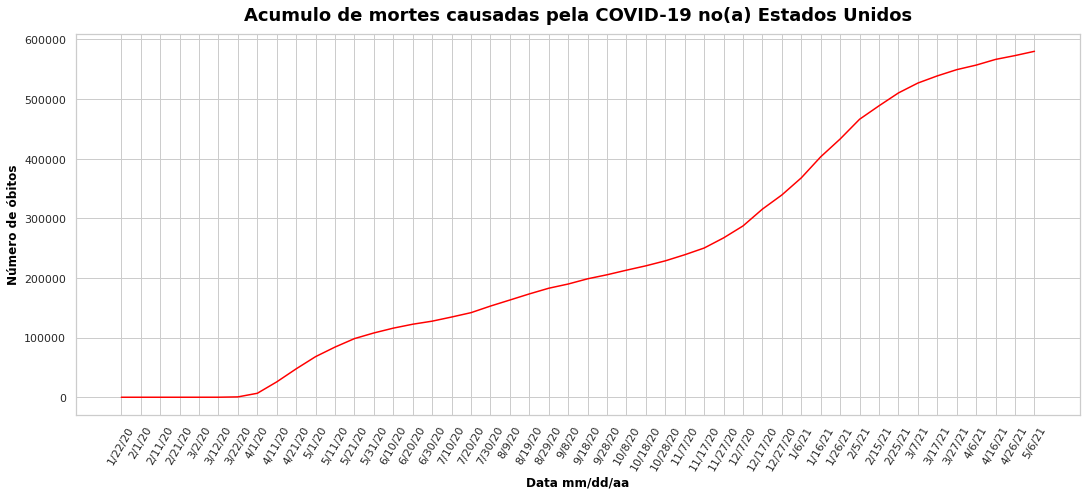

In [101]:
Grafico_de_linha(data_us, mortes_us, 'Estados Unidos')

# **Dados dos óbitos na Índia**

In [29]:
mortes_india = mortes_globais.loc['India']

In [30]:
mortes_india = mortes_india.loc[::10]

In [31]:
data_id = mortes_india.index
mortes_id = mortes_india.values

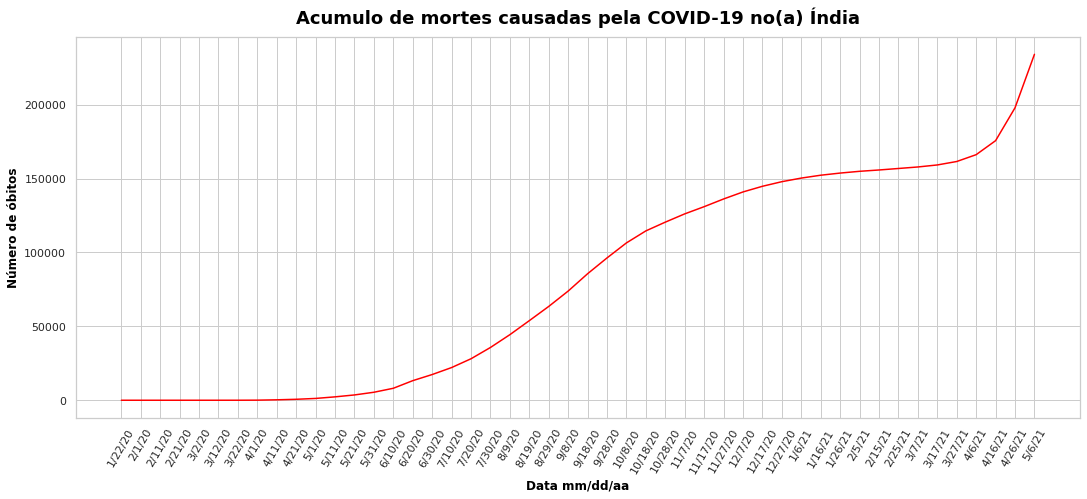

In [102]:
Grafico_de_linha(data_id, mortes_id, 'Índia')

# **Comparando o número de óbitos dos países**

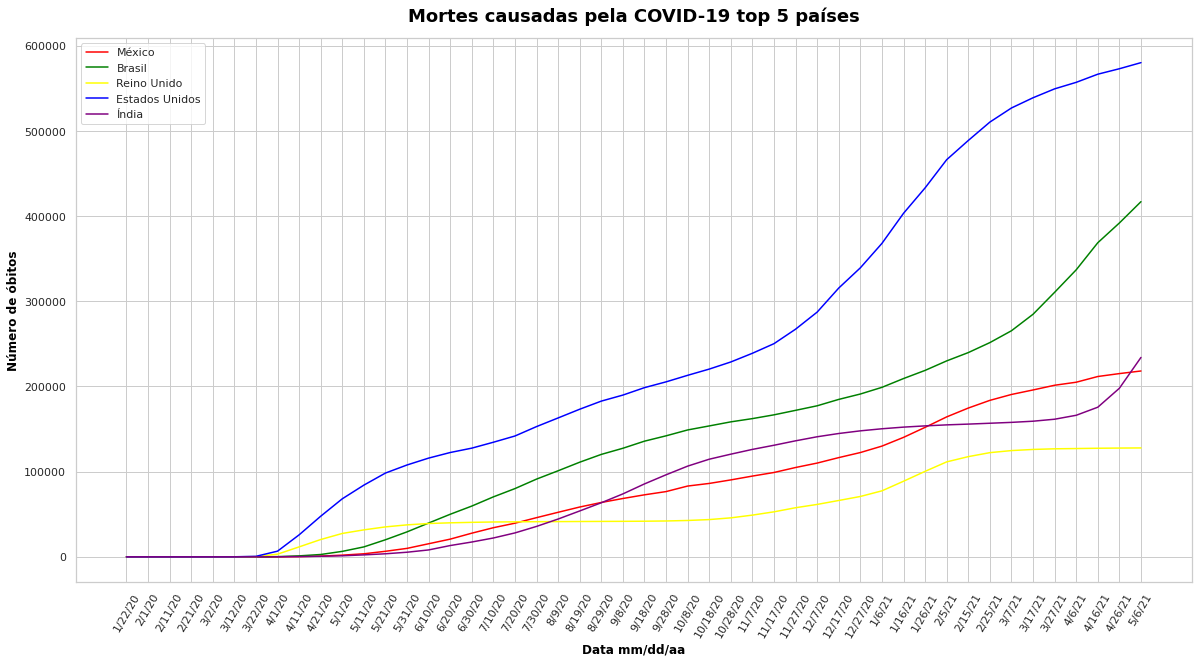

In [105]:
plt.figure(figsize = (20,10))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Mortes causadas pela COVID-19 top 5 países',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de óbitos',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_mx, mortes_mx, color = 'red')
plt.plot(mortes_br, color = 'green')
plt.plot(mortes_uk, color = 'yellow')
plt.plot(mortes_us, color = 'blue')
plt.plot(mortes_id, color = 'purple')
plt.legend(['México', 'Brasil', 'Reino Unido', 'Estados Unidos', 'Índia'])
plt.show()